# Visualization

PyNeuraLogic offers multiple options for visualization of templates and samples, which can be helpful while investigating how the high-level rule representations are being translated into computation graphs. The usage of visualization tools requires having installed [Graphviz](https://graphviz.org/download/).

Depending on the parametrization, the drawing methods can output either graph image in bytes, graph image rendered into a file, or graph image displayed into IPython (Jupyter Notebook).

Additionally, it is also possible to retrieve the generated source of graphs in the DOT format. This format can then be used to display or further customize and manipulate generated graphs in other libraries.


## Visualization of the XOR Example

To showcase the usage of visualization tools, we will use the template and the dataset introduced in 
[XOR Example](https://github.com/LukasZahradnik/PyNeuraLogic/blob/master/examples/IntroductionIntoPyNeuraLogic.ipynb)
<a href="https://colab.research.google.com/github/LukasZahradnik/PyNeuraLogic/blob/master/examples/IntroductionIntoPyNeuraLogic.ipynb">
<img alt="Open in Colab" title="Open in Colab" style="display: inline !important" src=https://colab.research.google.com/assets/colab-badge.svg />
</a>


### Model Rendering

All that is needed to visualize the model - the template with current weights' values is to call the `draw_model` function.


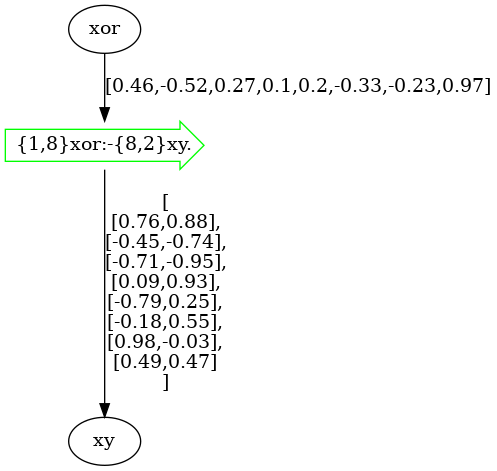

In [1]:
from neuralogic.utils.visualize import draw_model
from neuralogic.utils.data import XOR_Vectorized
from neuralogic.core import Settings, Backend


template, dataset = XOR_Vectorized()
model = template.build(Backend.JAVA, Settings())

draw_model(model)

<div class="alert alert-block alert-info">
    If you are using evaluators, you can get the model object via the <code>evaluator.model</code> property.
</div>


Templates (models) and samples can be drawn into various raster formats (such as PNG or JPEG) or SVG format, which is considerably faster for larger graphs. To set the format, simply use the `img_type` parameter.

The drawing can be further parameterized, for example, with the `value_detail` parameter to display more (or less) decimal places of all values (there are three levels of detail - `0-2`, where `0` has the least number of decimals and `2` the most number of decimals).

The model above was directly drawn into Jupyter Notebook without any parametrization. To draw the model into a file, all we have to do is add the `filename` parameter with a path to the output image, such as:

```draw_model(model, filename="my_image.png")```

We can also get raw images bytes by turning off displaying into IPython:

```draw_model(model, draw_ipython=False)```


<div class="alert alert-block alert-info">
If you are drawing straight into Jupyter Notebook, you can include additional parameters into drawing functions to customize the underlying <a href="https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image" target="_blank">Image</a> and <a href="https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image" target="_blank">SVG</a> objects.
</div>


### Samples Rendering

Samples can be drawn in the same way and supports the same parametrization as the model drawing.

An example of drawing samples can be seen in the code below, where we render the actual computation graph for the first example (input `[0, 0]`).

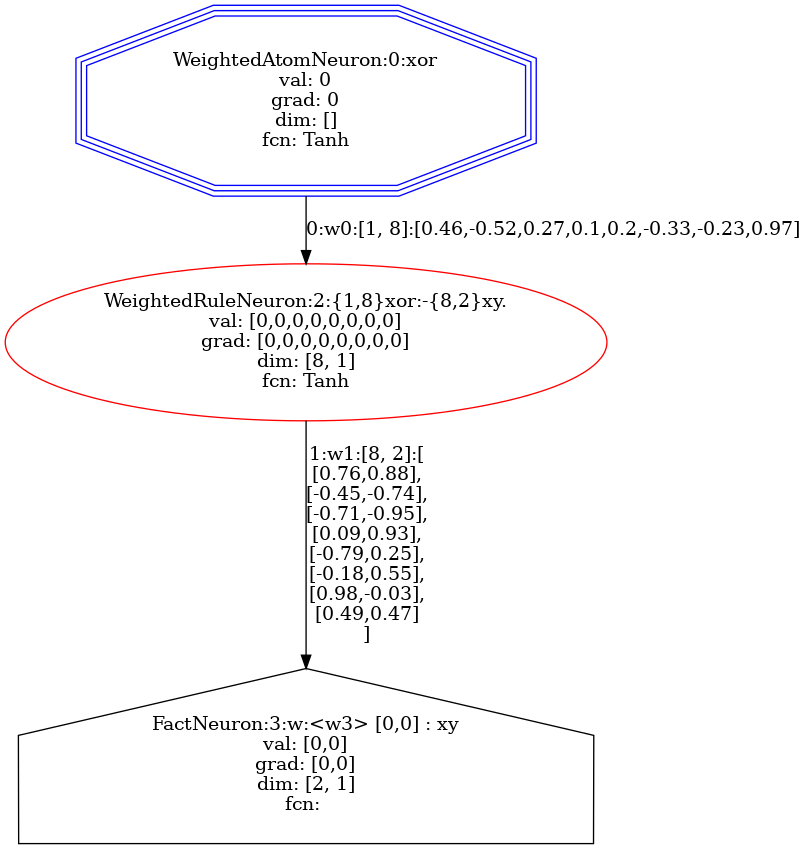

In [2]:
from neuralogic.utils.visualize import draw_sample

built_dataset = model.build_dataset(dataset)

draw_sample(built_dataset.samples[0])

### Getting the DOT Source

To get the DOT source of the model or the sample, all you have to do is call the `model_to_dot_source` function or the `sample_to_dot_source` function, respectively.

In [3]:
from neuralogic.utils.visualize import sample_to_dot_source


dot_source = sample_to_dot_source(built_dataset.samples[0])
print(dot_source)

digraph G {
3 [shape=house, color=black, label="FactNeuron:3:w:<w3> [0,0] : xy
val: [0,0]
grad: [0,0]
dim: [2, 1]
fcn: 
"]

2 [shape=ellipse, color=red, label="WeightedRuleNeuron:2:{1,8}xor:-{8,2}xy.
val: [0,0,0,0,0,0,0,0]
grad: [0,0,0,0,0,0,0,0]
dim: [8, 1]
fcn: Tanh
"]
2 -> 3 [label="1:w1:[8, 2]:[
[0.76,0.88],
[-0.45,-0.74],
[-0.71,-0.95],
[0.09,0.93],
[-0.79,0.25],
[-0.18,0.55],
[0.98,-0.03],
[0.49,0.47]
]"]

0 [shape=ellipse, color=blue, label="WeightedAtomNeuron:0:xor
val: 0
grad: 0
dim: []
fcn: Tanh
"]
0 -> 2 [label="0:w0:[1, 8]:[0.46,-0.52,0.27,0.1,0.2,-0.33,-0.23,0.97]"]

0 [shape = tripleoctagon]
}

